# Create data

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.gofplots import qqplot
import warnings
from IPython.display import display, Math, Latex, Markdown

warnings.filterwarnings("ignore")

In [2]:
cotton_weight_percent = [
    15,
    15,
    15,
    15,
    15,
    20,
    20,
    20,
    20,
    20,
    25,
    25,
    25,
    25,
    25,
    30,
    30,
    30,
    30,
    30,
    35,
    35,
    35,
    35,
    35,
]
observations = [
    7,
    7,
    15,
    11,
    9,
    12,
    16,
    12,
    18,
    18,
    14,
    19,
    19,
    18,
    18,
    19,
    25,
    22,
    19,
    23,
    7,
    10,
    11,
    15,
    11,
]

In [3]:
df = pd.DataFrame(
    {"observations": observations, "cotton_weight_percent": cotton_weight_percent}
)

In [4]:
df

,observations,cotton_weight_percent
0,7,15
1,7,15
2,15,15
3,11,15
4,9,15
5,12,20
6,16,20
7,12,20
8,18,20
9,18,20


# One-way ANOVA

In [5]:
model = ols("observations ~ C(cotton_weight_percent)", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           observations   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     14.96
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           8.26e-06
Time:                        22:48:54   Log-Likelihood:                -58.583
No. Observations:                  25   AIC:                             127.2
Df Residuals:                      20   BIC:                             133.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.8000      1.260      7.777      0.000       7.171      12.429
C(cotton_weight_percent)[T.20]     5.4000      1.782      3.030      0.007       1.683       9.117
C(cotton_weight_percent)[T.25]     7.8000      1.782      4.377      0.000       4.083      11.517
C(cotton_weight_percent)[T.30]    11.8000      1.782      6.621      0.000       8.083      15.517
C(cotton_weight_percent)[T.35]     1.0000      1.782      0.561      0.581      -2.717       4.717
==============================================================================
Omnibus:                        1.322   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.949
Skew:                           0.154   Prob(JB):                        0.622
Kurtosis:                       2.096   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
res = anova_lm(model, typ=1)

In [7]:
def model_evaluation(
    model,
    independent_name: str = "cotton",
    dependent_name: str = "tensile strength",
    alpha=0.5,
):
    p_value = model.f_pvalue
    display(
        Markdown(
            f"""
**Null hypothesis**: All means are equal.<br>
**Alternative hypothesis**: Not all mean are equal<br>
**Significance level**: α = {alpha}

The F-statistic of the model is {round(model.fvalue, 6)}. The p-value of the model is {round(p_value, 6)}."""
        )
    )
    if p_value > alpha:
        display(
            Markdown(
                f"""Since the p-value is greater than the significance level of {alpha}, the differences between the means are not statistically significant."""
            )
        )
    else:
        display(
            Markdown(
                f"""Since the p-value is less than the significance level of {alpha}, there is enough evidence to claim that the differences between some of the means are statistically significant."""
            )
        )

In [8]:
model_evaluation(model)


**Null hypothesis**: All means are equal.<br>
**Alternative hypothesis**: Not all mean are equal<br>
**Significance level**: α = 0.5

The F-statistic of the model is 14.962217. The p-value of the model is 8e-06.

Since the p-value is less than the significance level of 0.5, there is enough evidence to claim that the differences between some of the means are statistically significant.

# Compare Each Pair of Means Using Tukey's HSD

In [9]:
comparison = MultiComparison(df["observations"], df["cotton_weight_percent"])
comparison_results = comparison.tukeyhsd()

In [10]:
comparison_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
15,20,5.4,0.0463,0.0668,10.7332,True
15,25,7.8,0.0024,2.4668,13.1332,True
15,30,11.8,0.001,6.4668,17.1332,True
15,35,1.0,0.9,-4.3332,6.3332,False
20,25,2.4,0.6493,-2.9332,7.7332,False
20,30,6.4,0.014,1.0668,11.7332,True
20,35,-4.4,0.1379,-9.7332,0.9332,False
25,30,4.0,0.2043,-1.3332,9.3332,False
25,35,-6.8,0.0085,-12.1332,-1.4668,True
30,35,-10.8,0.001,-16.1332,-5.4668,True


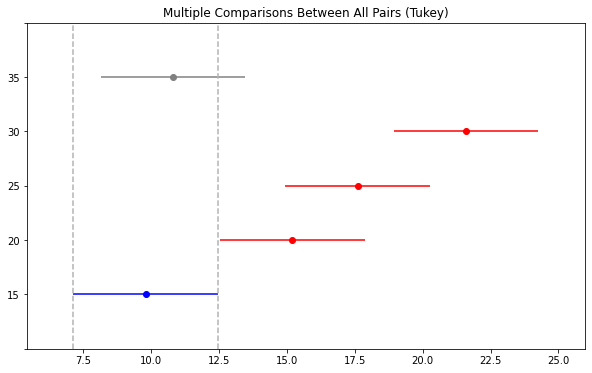

In [11]:
fig_15 = comparison_results.plot_simultaneous(comparison_name=15)

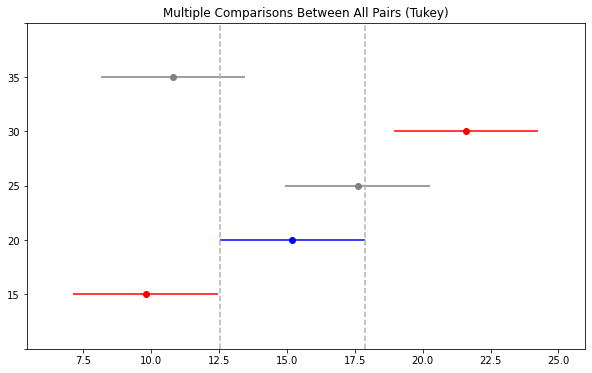

In [12]:
fig_20 = comparison_results.plot_simultaneous(comparison_name=20)

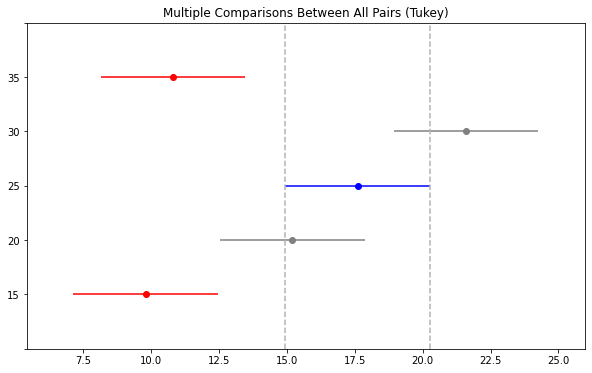

In [13]:
fig_25 = comparison_results.plot_simultaneous(comparison_name=25)

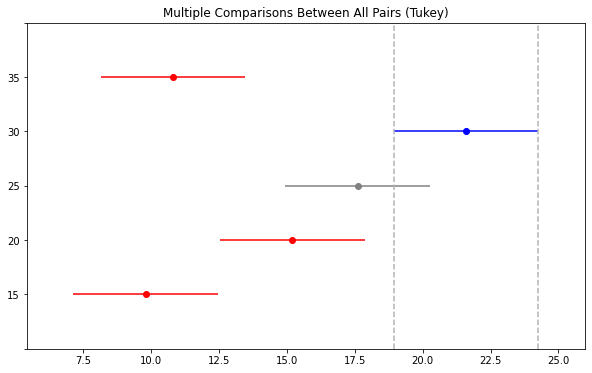

In [14]:
fig_30 = comparison_results.plot_simultaneous(comparison_name=30)

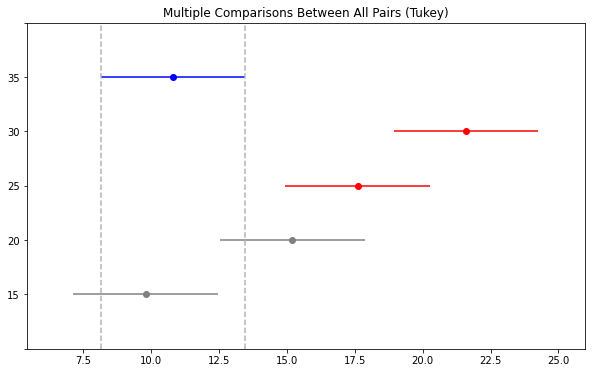

In [15]:
fig_35 = comparison_results.plot_simultaneous(comparison_name=35)

# Check model assumptions

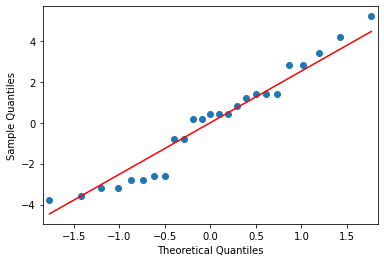

In [16]:
residuals = model.resid
plot = qqplot(residuals, line="s")